# Fuzzy c-means (FCM)

L'algorithme** Fuzzy c-means (FCM) est une méthode de clustering qui permet à une donnée d'appartenir à deux ou plusieurs clusters. Cette méthode (développée par Dunn en 1973 et améliorée par Bezdek en 1981) est fréquemment utilisée en reconnaissance de formes. Voici la documentation officielle de l'algorithme https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/cmeans.html

In [69]:
import pandas as pd 
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal 
from sklearn.datasets import load_iris
import matplotlib.image as mpimg

In [70]:
# le paramètre m
m = 2

#le nombre maximum des itérations
MAX_ITERS = 50

Le paramètre MAX_ITER agit comme une condition d'arrêt dans notre boucle afin d'éviter une boucle infinie. Pour le paramètre fuzzy on a pris la valeur 2.

### Initialisation de la matrice de membrance
les valeurs de la matrice sont attribuées de manière aléatoire.

In [16]:
def initializeMembershipWeights(k,n):

    weight = np.random.dirichlet(np.ones(k),n)
    weight_arr = np.array(weight)
    return weight_arr

### Calcul du centre des clusters

Pour calculer les centroïdes de chaque cluster, nous appliquons la formule suivante :

<img src="form1.png" alt="drawing" width="250"/>

In [17]:
def computeCentroids(weight_arr,k,d,df):
    C = []
    for i in range(k):
        weight_sum = np.power(weight_arr[:,i],m).sum()
        Cj = []
        for x in range(d):
            numerator = ( df.iloc[:,x].values * np.power(weight_arr[:,i],m)).sum()
            c_val = numerator/weight_sum;
            Cj.append(c_val)
        C.append(Cj)
    return C 

### Mise à jour des poids

Pour mettre à jour les poids, nous appliquons la formule suivante :

<img src="form2.png" alt="drawing" width="250"/>

In [18]:
def updateWeights(weight_arr,C,k,df,n):
    denom = np.zeros(n)
    for i in range(k):
        dist = (df.iloc[:,:].values - C[i])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        denom  = denom + np.power(1/dist,1/(m-1))

    for i in range(k):
        dist = (df.iloc[:,:].values - C[i])**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        weight_arr[:,i] = np.divide(np.power(1/dist,1/(m-1)),denom)
    return weight_arr

### Algorithme fuzzy c-means

In [68]:
def FuzzyMeansAlgorithm(k,d,df,n):
    weight_arr = initializeMembershipWeights(k,n)
    #plt.figure(figsize=(50,50)) 
    for z in range(MAX_ITERS):
        C = computeCentroids(weight_arr,k,d,df)
        updateWeights(weight_arr,C,k,df,n)
        #plotData(z,C)
        #plt.show()
    return (weight_arr,C)

# Segmentation d'image

In [22]:
#transformer l'image en gray scale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [34]:
img = mpimg.imread('chat.jpeg')
img = rgb2gray(img)
#flatten image
flatten_img = img.flatten().astype('float')
img_df=pd.DataFrame(flatten_img)

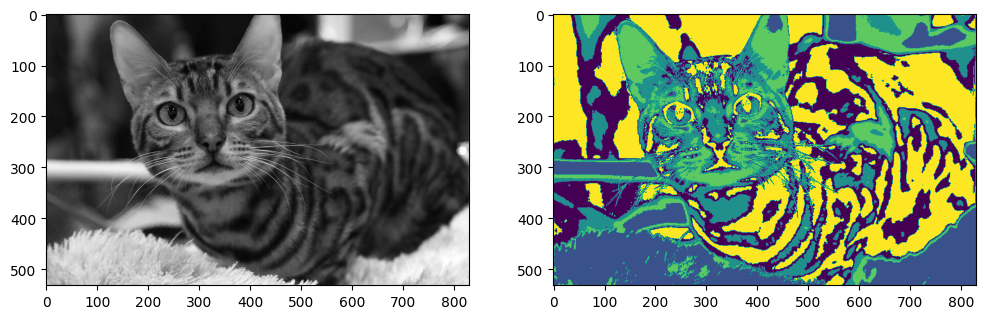

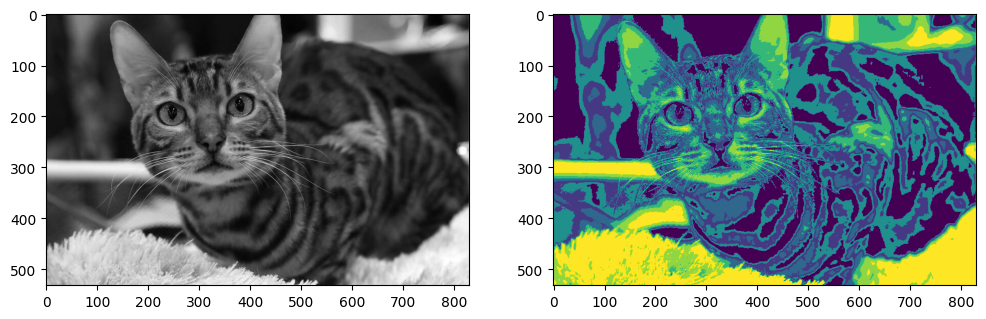

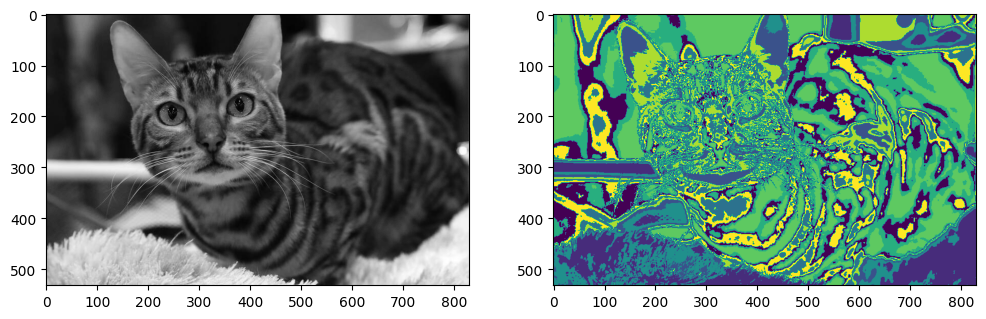

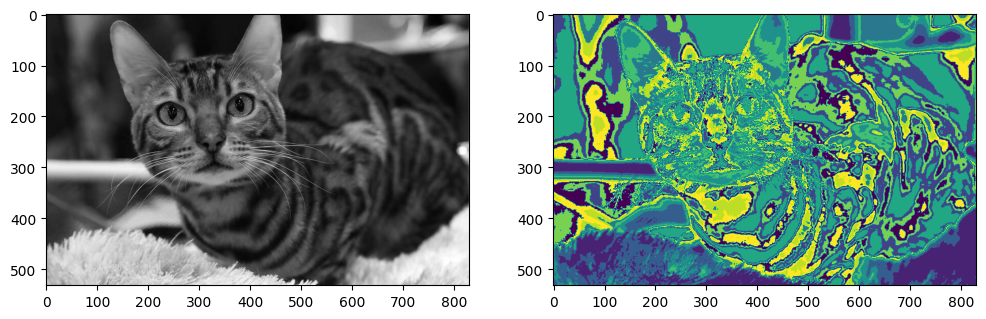

In [67]:
for i in (5,7,9,11):
    
    final_weights,Centers = FuzzyMeansAlgorithm(i,1,img_df,len(img_df))
    reshaped_img = np.argmax(final_weights,axis=1).reshape(img.shape).astype('int')  
    fig=plt.figure(figsize=(12,8),dpi=100)            
    ax1=fig.add_subplot(1,2,1)
    ax1.imshow(img,cmap='gray')
    ax2=fig.add_subplot(1,2,2)
    ax2.imshow(reshaped_img)
    plt.show(block=False)
    plt.close()

Dans cette partie j'ai visualisé la segmentation d el'image, avec différents nombre de clusters, 5, 7, 9 et 11.  

# Fuzzy C-Means pour le dataset Iris

Dans cette partie on va utiliser le clustering c-means flou pour le jeu de données iris. Cet ensemble de données a été collecté par le botaniste Edgar Anderson et contient des échantillons aléatoires de fleurs appartenant à trois espèces de fleurs d'iris : setosa, versicolor et virginica. Pour chacune des espèces, l'ensemble de données contient 50 observations pour la longueur du sépale, la largeur du sépale, la longueur du pétale et la largeur du pétale.

In [78]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data)

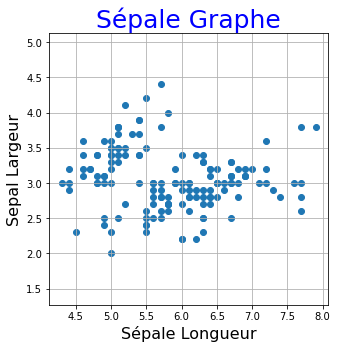

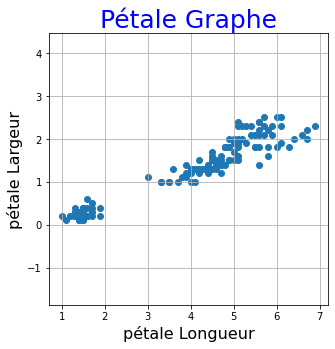

In [92]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(iris_df.iloc[:,0]), list(iris_df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sépale Longueur', fontsize=16)                                                 
plt.ylabel('Sepal Largeur', fontsize=16)                                                 
plt.title('Sépale Graphe', fontsize=25,color='b')                                            
plt.grid()                                                    
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(iris_df.iloc[:,2]), list(iris_df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('pétale Longueur', fontsize=16)                                                 
plt.ylabel('pétale Largeur', fontsize=16)                                                 
plt.title('Pétale Graphe', fontsize=25,color='b')                                            
plt.grid()                                                                 
plt.show()

In [80]:
final_weights,Centers = FuzzyMeansAlgorithm(3,4,iris_df,len(iris_df))

In [81]:
df_sepal = iris_df.iloc[:,0:2]
df_petal = iris_df.iloc[:,2:5] 

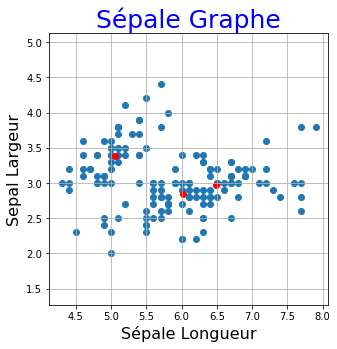

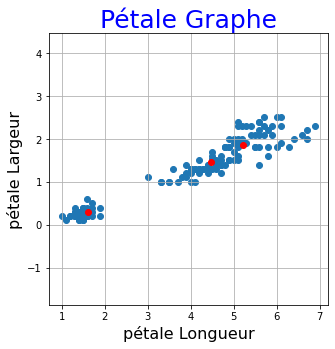

In [91]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_sepal.iloc[:,0]), list(df_sepal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sépale Longueur', fontsize=16)                                                 
plt.ylabel('Sepal Largeur', fontsize=16)                                                 
plt.title('Sépale Graphe', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
    plt.scatter(center[0],center[1], marker='o',color='r')                                                                
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_petal.iloc[:,0]), list(df_petal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('pétale Longueur', fontsize=16)                                                 
plt.ylabel('pétale Largeur', fontsize=16)                                                 
plt.title('Pétale Graphe', fontsize=25,color='b')                                            
plt.grid()                     
for center in Centers:
    plt.scatter(center[2],center[3], marker='o',color='r')                                                       
plt.show()

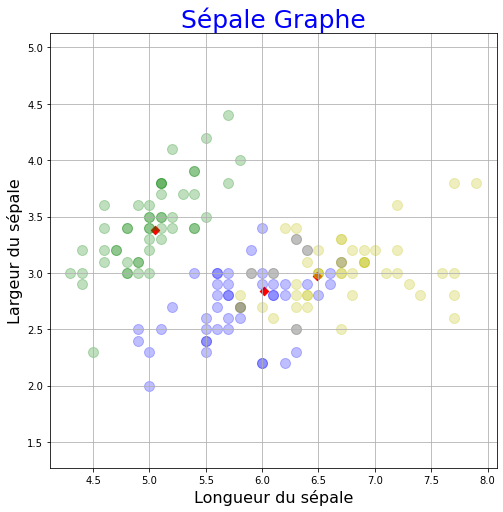

In [89]:
n=len(iris_df)
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                               
plt.axis('equal')                                                                 
plt.xlabel('Longueur du sépale', fontsize=16)                                                 
plt.ylabel('Largeur du sépale', fontsize=16)                                                 
plt.title('Sépale Graphe', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
    plt.scatter(center[0],center[1], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
        clr = 'b'
    elif cNumber[0][0]==1:
        clr = 'y'
    elif cNumber[0][0]==2:
        clr = 'g'
    plt.scatter(list(df_sepal.iloc[i:i+1,0]), list(df_sepal.iloc[i:i+1,1]), alpha=0.25,s=100,color=clr)
plt.show()

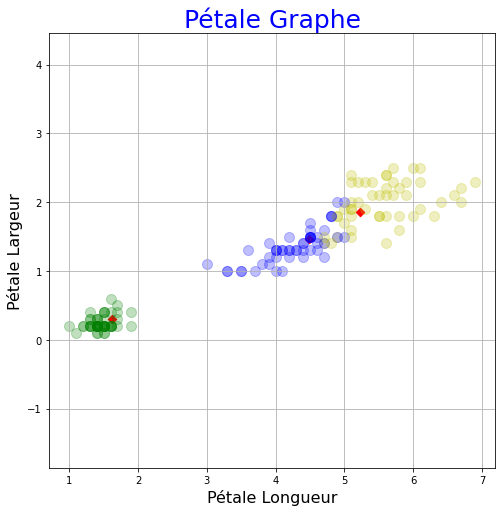

In [90]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                          
plt.axis('equal')                                                                 
plt.xlabel('Pétale Longueur', fontsize=16)                                                 
plt.ylabel('Pétale Largeur', fontsize=16)                                                 
plt.title('Pétale Graphe', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
    plt.scatter(center[2],center[3], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
        clr = 'b'
    elif cNumber[0][0]==1:
        clr = 'y'
    elif cNumber[0][0]==2:
        clr = 'g'
    plt.scatter(list(df_petal.iloc[i:i+1,0]), list(df_petal.iloc[i:i+1,1]), alpha=0.25, s=100, color=clr)
plt.show()

# Commentaires

Durant ce travail on a implémenté les différentes étapes de l'algorithme fuzzy c-means, et on a appliqué l'algorithme sur deux types de données, une image et le dataset iris. 

L'algorithme a prouvé sa performance pour la segmentation d'image on peut voir sur les images avec les différents nombres de clusters que l'algorithme a réussi à mettre en valeur et faire apparaître les caractéristiques du chat, ce qui facilite la tâche pour la classification de l'image. 

L'application de l'algorithme fuzzy c-means sur la dataset Iris nous a permi de faire la segmentation des individus de la datasets en 3 différents classes avec la possibilité d’apartenir à plusieurs classes au même temps, on voit bien sur les graphe la distrubution ainsi que la classification de tous les individus et aussi les centres de chaque classe, on peut dire que l'algorithme est efficace avec ce types de données. 

Comme pour les réseaux de neurones, l'optimisation des hyperparamètres est aussi importante pour ce type de problème. 

Il pourrait être intéressant d'utiliser ce réseau sur un ensemble massif de données.